# Grupo 20
* Angie Ximena Lopez Cruz
* Laura Juliana Ferreira
* Maria Juliana Ballesteros Estupiñan

## 1. Instalación e importanción de librerías.

In [1]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [2]:
%pip install spacy

In [3]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 33.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
%pip install num2words

In [5]:
%pip install unidecode

In [6]:
import nltk

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 2. Perfilamiento y entendimiento de Datos

In [10]:
import pandas as pd

# Lee el archivo Excel
df_opiniones = pd.read_excel("Datos_proyecto.xlsx", engine="openpyxl")

# Revisa las primeras filas
print(df_opiniones.head())

                                              textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3


In [11]:
# Info general
print(df_opiniones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB
None



Tenemos dos columnas en los datos, "textos" que son las opiniones y "labels" que es la categoria en la que se clasifica, esta es de tipo entero.

In [12]:
df_opiniones

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


Acá podemos ver que algunas opiniones tienen carácteres especiales como las comillas y algunos acentos.

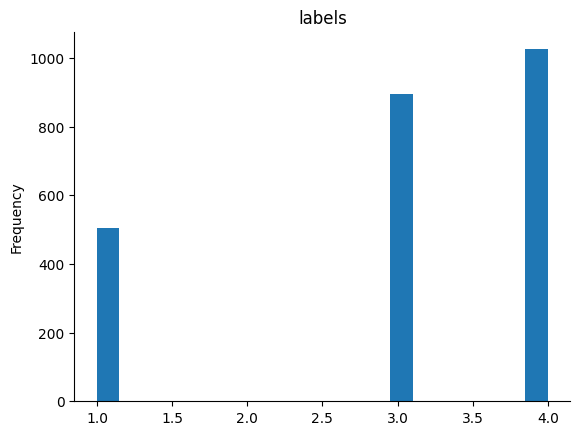

In [13]:
# @title labels

from matplotlib import pyplot as plt
df_opiniones['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

Esto nos deja ver que la cantidad de datos proporcionados para el entrenamiento y revisión de resultados tiene mayor concentración en la categoría 4 y que la categoría 1, es la que menos tiene datos.

In [14]:
# Distribución de clases ODS
print(df_opiniones["labels"].value_counts())

labels
4    1025
3     894
1     505
Name: count, dtype: int64


In [15]:
textos = df_opiniones.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
textos['Moda'] = [[pd.Series([len(x) for x in i.split(' ')]).mode().iloc[0]][0] for i in textos['textos']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Moda_palabra'] = [pd.Series(i.split()).mode().iloc[0] for i in textos['textos']]

In [16]:
textos

,textos,labels,Conteo,Moda,Max,Min,Moda_palabra
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,2,14,1,de
1,Para los niños más pequeños (bebés y niños peq...,4,516,3,16,1,y
2,"Además, la formación de especialistas en medic...",3,659,2,15,1,de
3,En los países de la OCDE se tiende a pasar de ...,4,693,2,18,1,de
4,Este grupo se centró en las personas que padec...,3,608,2,14,0,de
...,...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,2,16,1,de
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,2,15,1,de
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,2,12,1,el
2422,"Sin embargo, estas fallas del mercado implican...",3,754,2,15,1,de


Esto nos deja ver que las opiniones en promedio tienen 500 palabras, por lo que no es una frace, pero tampoco un texto muy largo.
Esto nos sirve para ver que modelos podrían tener mejor precisión.

In [17]:
# Duplicados
print(df_opiniones.duplicated().sum())

0


No hay ningún duplicado

In [18]:
# Valores nulos
print(df_opiniones.isnull().sum())

textos    0
labels    0
dtype: int64


No hay valores nulos

In [19]:
# Número de filas y columnas
print(df_opiniones.shape)

(2424, 2)


Nos proporcionan 2424 opniones clasificadas, que son dos diferentes columnas.

### 2.1 Limpieza básica de datos

En esta etapa se prepararon los textos crudos con el objetivo de reducir ruido y asegurar consistencia antes de aplicar los modelos de clasificación. Se convirtieron todos los caracteres a minúsculas para evitar duplicidad de términos, se eliminaron tildes y signos de puntuación, y se normalizaron los espacios en blanco. Estas transformaciones permiten homogenizar el corpus, facilitando que el modelo identifique patrones en lugar de variaciones superficiales en la escritura. El resultado de este proceso son opiniones depuradas que mantienen el contenido semántico, pero sin elementos irrelevantes para el análisis

Para la limpieza de datos, pasamos todas las palabras a minúscula, quitamos las tildes y normalizamos acentos. Luego quitamos la puntuación y los espacios extras.
Todo lo anterior con el fin de normalizar las palabras y que palabras como Casa y casa sean tratadas como las mismas que son.

In [20]:

import re
from unidecode import unidecode

""" Paso a minúscula"""
def to_lower(text: str) -> str:
    return str(text).lower()

""" Quito tíldes y normaliza acentos como ñ"""
def normalize_accents(text: str) -> str:
    return unidecode(str(text))

""" Quito puntuación """
def remove_punctuation(text: str) -> str:
    return re.sub(r"[^\w\s]", " ", str(text))

"""Quito espacios extras """
def normalize_whitespace(text: str) -> str:
    return re.sub(r"\s+", " ", str(text)).strip()

# Orquestador de la limpieza básica
def basic_clean(text: str) -> str:
    text = to_lower(text)
    text = normalize_accents(text)
    text = remove_punctuation(text)
    text = normalize_whitespace(text)
    return text

In [21]:
df_opiniones["texto_limpio"] = df_opiniones["textos"].apply(basic_clean)
df_opiniones[["textos","texto_limpio"]].head()

,textos,texto_limpio
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",aprendizaje y educacion se consideran sinonimo...
1,Para los niños más pequeños (bebés y niños peq...,para los ninos mas pequenos bebes y ninos pequ...
2,"Además, la formación de especialistas en medic...",ademas la formacion de especialistas en medici...
3,En los países de la OCDE se tiende a pasar de ...,en los paises de la ocde se tiende a pasar de ...
4,Este grupo se centró en las personas que padec...,este grupo se centro en las personas que padec...


In [22]:
df_opiniones['texto_limpio']

,texto_limpio
0,aprendizaje y educacion se consideran sinonimo...
1,para los ninos mas pequenos bebes y ninos pequ...
2,ademas la formacion de especialistas en medici...
3,en los paises de la ocde se tiende a pasar de ...
4,este grupo se centro en las personas que padec...
...,...
2419,la tutoria de carrera esta disenada para apoya...
2420,fuente ministerio de educacion las tasas inter...
2421,y desde 2010 el pnud ha sido pionero en la pue...
2422,sin embargo estas fallas del mercado implican ...


### 2.2 Tokenización

Una vez obtenidos los textos limpios, se realizó la tokenización, que consiste en dividir cada oración en unidades mínimas de análisis llamadas tokens (generalmente palabras). Este paso es fundamental en tareas de Procesamiento de Lenguaje Natural (PLN), ya que transforma el texto en una representación estructurada que puede ser utilizada por los algoritmos. En nuestro caso, se utilizaron herramientas de NLTK configuradas en idioma español, de manera que los textos se transformaron en listas de palabras que reflejan mejor la composición del lenguaje.

In [23]:
from nltk.tokenize import word_tokenize

def tokenize_nltk(text):
    return word_tokenize(text, language="spanish")


In [24]:

df_opiniones['words'] = df_opiniones['texto_limpio'].apply(tokenize_nltk)
df_opiniones[['texto_limpio','words']].head()

,texto_limpio,words
0,aprendizaje y educacion se consideran sinonimo...,"[aprendizaje, y, educacion, se, consideran, si..."
1,para los ninos mas pequenos bebes y ninos pequ...,"[para, los, ninos, mas, pequenos, bebes, y, ni..."
2,ademas la formacion de especialistas en medici...,"[ademas, la, formacion, de, especialistas, en,..."
3,en los paises de la ocde se tiende a pasar de ...,"[en, los, paises, de, la, ocde, se, tiende, a,..."
4,este grupo se centro en las personas que padec...,"[este, grupo, se, centro, en, las, personas, q..."


In [25]:
df_opiniones['words']

,words
0,"[aprendizaje, y, educacion, se, consideran, si..."
1,"[para, los, ninos, mas, pequenos, bebes, y, ni..."
2,"[ademas, la, formacion, de, especialistas, en,..."
3,"[en, los, paises, de, la, ocde, se, tiende, a,..."
4,"[este, grupo, se, centro, en, las, personas, q..."
...,...
2419,"[la, tutoria, de, carrera, esta, disenada, par..."
2420,"[fuente, ministerio, de, educacion, las, tasas..."
2421,"[y, desde, 2010, el, pnud, ha, sido, pionero, ..."
2422,"[sin, embargo, estas, fallas, del, mercado, im..."


In [26]:
import nltk
from nltk.corpus import stopwords

stopwords_es = set(stopwords.words('spanish'))

def remove_stopwords(tokens):
    """
    Elimina stopwords en español de una lista de tokens.
    """
    return [t for t in tokens if t.lower() not in stopwords_es]


In [27]:
df_opiniones['words']= df_opiniones['words'].apply(remove_stopwords)


In [28]:
df_opiniones['words']

,words
0,"[aprendizaje, educacion, consideran, sinonimos..."
1,"[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"[ademas, formacion, especialistas, medicina, g..."
3,"[paises, ocde, tiende, pasar, cursos, obligato..."
4,"[grupo, centro, personas, padecen, trastornos,..."
...,...
2419,"[tutoria, carrera, disenada, apoyar, estudiant..."
2420,"[fuente, ministerio, educacion, tasas, interna..."
2421,"[2010, pnud, sido, pionero, puesta, marcha, pr..."
2422,"[embargo, fallas, mercado, implican, competenc..."


### 2.3 Vectorización

Tras la tokenización, fue necesario convertir las listas de palabras en representaciones numéricas para que pudieran ser procesadas por los algoritmos de clasificación. Para ello se aplicó la técnica TF-IDF (Term Frequency – Inverse Document Frequency). Este método asigna un peso a cada término en función de su frecuencia en un documento y su rareza en el conjunto de datos. De esta manera, se destacan las palabras más relevantes para diferenciar categorías, mientras que se reducen los pesos de términos muy frecuentes pero poco informativos. La matriz TF-IDF resultante constituye la base de entrenamiento para los modelos de clasificación utilizados en el proyecto.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorizar_tfidf(df, tokens_col="words", min_df=2, max_df=0.8):
    """
    Une tokens en texto y vectoriza con TF-IDF.

    Parámetros:
        df : DataFrame que contiene la columna con listas de tokens.
        tokens_col : nombre de la columna de tokens (default="words").
        min_df : descarta términos que aparecen en menos de 'min_df' documentos.
        max_df : descarta términos que aparecen en más del 'max_df' de documentos.

    Retorna:
        X_tfidf : matriz TF-IDF
        tfidf : vectorizador entrenado
        df : DataFrame con nueva columna 'texto_final'
    """
    # Unir tokens
    df["texto_final"] = df[tokens_col].apply(lambda x: " ".join(x))

    # Vectorizador TF-IDF
    tfidf = TfidfVectorizer(min_df=min_df, max_df=max_df)
    X_tfidf = tfidf.fit_transform(df["texto_final"])

    return X_tfidf, tfidf, df


Acá decidimos para tener mayor precisión en las palabras que fueran decisivas en la predición de la ODS, tener en cuenta las palabras que estuvieran en al menos 3 documentos.

In [30]:
X_tfidf, tfidf, df_opiniones = vectorizar_tfidf(df_opiniones, tokens_col="words", min_df=3)

print("Matriz TF-IDF:", X_tfidf.shape)
print("Primeras 10 features:", tfidf.get_feature_names_out()[:10])

Matriz TF-IDF: (2424, 5586)
Primeras 10 features: ['000' '02' '05' '06' '08' '10' '100' '1000' '104' '11']


In [31]:

df_opiniones[["texto_final", "textos"]]

,texto_final,textos
0,aprendizaje educacion consideran sinonimos esc...,"""Aprendizaje"" y ""educación"" se consideran sinó..."
1,ninos mas pequenos bebes ninos pequenos capaci...,Para los niños más pequeños (bebés y niños peq...
2,ademas formacion especialistas medicina genera...,"Además, la formación de especialistas en medic..."
3,paises ocde tiende pasar cursos obligatorios o...,En los países de la OCDE se tiende a pasar de ...
4,grupo centro personas padecen trastornos menta...,Este grupo se centró en las personas que padec...
...,...,...
2419,tutoria carrera disenada apoyar estudiantes co...,La tutoría de carrera está diseñada para apoya...
2420,fuente ministerio educacion tasas internas ret...,Fuente: Ministerio de Educación. Las Tasas Int...
2421,2010 pnud sido pionero puesta marcha presentac...,"Y desde 2010, el PNUD ha sido pionero en la pu..."
2422,embargo fallas mercado implican competencia si...,"Sin embargo, estas fallas del mercado implican..."


In [32]:
X_tfidf.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
print(tfidf.get_feature_names_out()[:400])

['000' '02' '05' '06' '08' '10' '100' '1000' '104' '11' '12' '120' '13'
 '14' '15' '150' '16' '160' '17' '1787' '18' '19' '1950' '1960' '1970'
 '1976' '1979' '1980' '1981' '1983' '1984' '1985' '1989' '1990' '1991'
 '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '20' '200' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2006a' '2007' '2008' '2009'
 '2009a' '2009b' '201' '2010' '2010a' '2010b' '2011' '2011a' '2011b'
 '2012' '2012a' '2012b' '2013' '2013a' '2013b' '2013c' '2014' '2014a'
 '2014b' '2015' '2015a' '2015c' '2016' '2016a' '2016b' '2017' '2018'
 '2018c' '2019' '201s' '2020' '2021' '203' '2030' '2050' '21' '219' '22'
 '23' '24' '25' '26' '27' '28' '29' '30' '300' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '40' '400' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '500' '51' '52' '53' '54' '55' '56' '57' '58' '59' '60' '600'
 '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '700' '71' '72' '73'
 '74' '75' '76' '77' '79' '80' '800' '81' '82' '83' '84' '85' '86' '8

In [34]:
import pandas as pd

tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df

,000,02,05,06,08,10,100,1000,104,11,...,web,world,www,xix,xx,xxi,york,zelanda,zona,zonas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Datos de test y train

In [35]:
y = df_opiniones["labels"]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                # tu matriz de características
    y,                      # tus etiquetas
    test_size=0.2,          # 20% test, 80% train
    random_state=42,        # para reproducibilidad
    stratify=y              # mantiene la misma proporción de clases
)

## Pipeline de preparación de datos:

Decidimos realizar un pipeline para la preparación de datos para que dentro del modelo de cada integrante solo sea pasarlo a este como primer paso.
Donde retorna dos datos:
 1. Matriz df-idf
 2. Df de los datos cargados con las nuevas variables (texto_limpio), (words), (texto_final)

In [54]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Paso 0: función para leer archivo ---
def load_excel(path, text_col="textos"):
    df = pd.read_excel(path, engine="openpyxl")
    return df[text_col]

# Named functions to replace lambdas
def apply_basic_clean(X):
    return pd.Series(X).astype(str).apply(basic_clean)

def apply_tokenize_nltk(X):
    return pd.Series(X).apply(tokenize_nltk)

def apply_remove_stopwords(X):
    return pd.Series(X).apply(remove_stopwords)

def apply_join_tokens(X):
    return pd.Series(X).apply(lambda toks: " ".join(toks))


# Wrappers for using your functions in the pipeline
clean_ft = FunctionTransformer(apply_basic_clean, validate=False)
tokenize_ft = FunctionTransformer(apply_tokenize_nltk, validate=False)
stopwords_ft = FunctionTransformer(apply_remove_stopwords, validate=False)
join_ft = FunctionTransformer(apply_join_tokens, validate=False)


# === Pipeline de preparación ===
prep_pipeline = Pipeline([
    ("clean", clean_ft),
    ("tokenize", tokenize_ft),
    ("rm_stop", stopwords_ft),
    ("join", join_ft),
    ("tfidf", TfidfVectorizer(min_df=3))
])

# Función práctica: leer Excel y transformar
def preparar_desde_excel(path_excel, text_col="textos"):
    textos = load_excel(path_excel, text_col=text_col)
    X_tfidf = prep_pipeline.fit_transform(textos)
    return X_tfidf, prep_pipeline

In [38]:
ejemplo_tfidf, pipeline_prep = preparar_desde_excel("Datos_proyecto.xlsx", text_col="textos")
print("Matriz TF-IDF:", ejemplo_tfidf.shape)

Matriz TF-IDF: (2424, 5586)


# Modelos:

##### 1. Regresión logística

Angie Ximena Lopez Cruz -202312848

* Para la tarea de clasificación de textos se seleccionó el modelo de Regresión Logística Multinomial, dado que es un algoritmo robusto, interpretable y ampliamente utilizado en problemas de clasificación multiclase. La regresión logística permite modelar directamente la probabilidad de que una opinión pertenezca a cada categoría de ODS, y su desempeño ha sido comprobado en numerosos trabajos de Procesamiento de Lenguaje Natural.

* Un aspecto importante del modelo es el hiperparámetro C, que controla la fuerza de la regularización. En este caso se utilizó regularización L2, que evita que los coeficientes del modelo crezcan excesivamente y ayuda a prevenir sobreajuste. El hiperparámetro C corresponde al inverso de la regularización: valores pequeños de C implican una regularización más fuerte (el modelo es más simple y generaliza mejor, aunque puede perder capacidad de ajuste), mientras que valores grandes de C reducen la regularización y permiten al modelo ajustarse más a los datos de entrenamiento. Por esta razón se evaluaron diferentes valores de C, con el objetivo de identificar el equilibrio óptimo entre sesgo y varianza.

 *** Se intentó realizar la estandarización a los datos antes de aplicar el modelo, sin embargo, los datos de test tienen mejores resultados al modelo sin estandarización.

In [39]:
#from sklearn.preprocessing import MaxAbsScaler

#scaler = MaxAbsScaler()  # conserva la sparsidad de TF-IDF
#X_train = scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

* Para la selección del mejor valor de C se empleó la técnica de validación cruzada (cross-validation). Este método consiste en dividir el conjunto de entrenamiento en varios subconjuntos (folds) y entrenar el modelo repetidamente, utilizando cada vez un fold distinto como validación y el resto como entrenamiento. La validación cruzada permite estimar de forma más confiable el rendimiento del modelo, al reducir la dependencia de una única partición de los datos. De esta manera, se mitiga el riesgo de sobreajuste y se obtiene una estimación más estable y representativa de la capacidad de generalización del modelo.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    make_scorer,
    f1_score,
    precision_score,
    recall_score
)

# ----------------------------
# 1) Definir métricas
# ----------------------------
scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "precision_macro": make_scorer(precision_score, average="macro"),
    "recall_macro": make_scorer(recall_score, average="macro")
}

# ----------------------------
# 2) Definir modelo y grid
# ----------------------------
param_grid = {"C": [0.01, 0.1, 1, 10]}
base_clf = LogisticRegression(
    penalty="l2",
    solver="saga",          # o "lbfgs" según prefieras
    multi_class="multinomial",
    max_iter=1000,
    random_state=42
)

grid = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1_macro",   # elige el mejor por F1 macro
    cv=5,
    n_jobs=-1,
    verbose=1
)

# ----------------------------
# 3) Ajustar con train
# ----------------------------
grid.fit(X_train, y_train)

print("Mejor C (CV):", grid.best_params_)
print("Mejor F1 macro (CV):", grid.best_score_)

# ----------------------------
# 4) Resultados en CV
# ----------------------------
cv_results = pd.DataFrame(grid.cv_results_)
cv_table = cv_results[
    ["param_C", "mean_test_f1_macro", "mean_test_precision_macro", "mean_test_recall_macro"]
]
print("\nResultados de validación cruzada:")
display(cv_table)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejor C (CV): {'C': 10}
Mejor F1 macro (CV): 0.9708206507369447

Resultados de validación cruzada:


,param_C,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro
0,0.01,0.349607,0.489295,0.420047
1,0.10,0.863196,0.922652,0.844646
2,1.00,0.960985,0.969662,0.954411
3,10.00,0.970821,0.974848,0.967491


Despues de obtener el mejor modelo con el hiperparámetro que nos da el grid, vamos a realizar la predición con los datos de test.


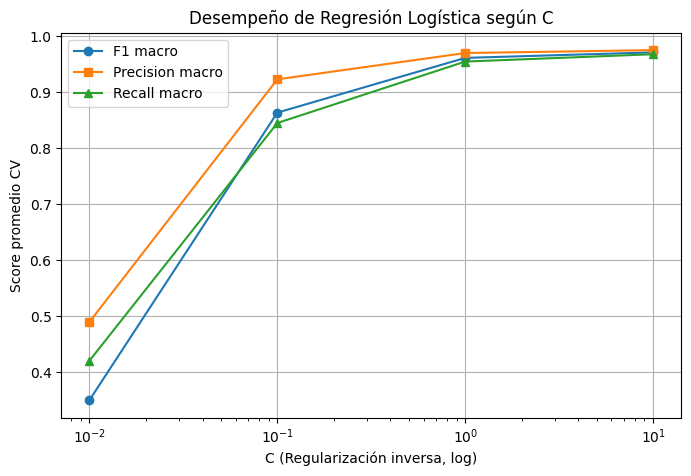

In [41]:

# ----------------------------
# 5) Gráfico comparativo
# ----------------------------
plt.figure(figsize=(8,5))
plt.plot(cv_table["param_C"], cv_table["mean_test_f1_macro"], marker="o", label="F1 macro")
plt.plot(cv_table["param_C"], cv_table["mean_test_precision_macro"], marker="s", label="Precision macro")
plt.plot(cv_table["param_C"], cv_table["mean_test_recall_macro"], marker="^", label="Recall macro")
plt.xscale("log")   # escala log para C
plt.xlabel("C (Regularización inversa, log)")
plt.ylabel("Score promedio CV")
plt.title("Desempeño de Regresión Logística según C")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 6) Resultados en test
# ----------------------------
best_model = grid.best_estimator_
rl_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification report (test):")
print(classification_report(y_test, y_pred, digits=4))

print("\nMatriz de confusión (test):")
print(confusion_matrix(y_test, y_pred))




Classification report (test):
              precision    recall  f1-score   support

           1     0.9596    0.9406    0.9500       101
           3     0.9609    0.9609    0.9609       179
           4     0.9710    0.9805    0.9757       205

    accuracy                         0.9649       485
   macro avg     0.9638    0.9607    0.9622       485
weighted avg     0.9649    0.9649    0.9649       485


Matriz de confusión (test):
[[ 95   5   1]
 [  2 172   5]
 [  2   2 201]]


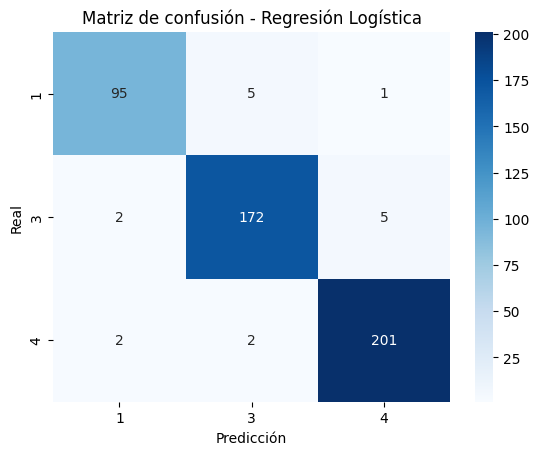

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresión Logística")
plt.show()


* En el conjunto de prueba, el modelo alcanzó un accuracy del 96.5% (clasificación correcta de los datos totales), con un F1 macro de 0.9622, lo que refleja un desempeño equilibrado entre las tres clases de ODS. En la clase ODS 1 (Pobreza) obtuvo una precisión de 95.9% y un recall de 94.0%, mostrando un buen desempeño aunque con algunos errores de confusión principalmente hacia ODS 3. La clase ODS 3 (Salud) presentó métricas balanceadas, con precisión y recall cercanas al 96%, mientras que la clase ODS 4 (Educación) fue la mejor predicha, alcanzando un recall de 98% y un F1 de 97.6%. La matriz de confusión muestra que la mayoría de los errores se dieron entre ODS 1 y ODS 3, aunque en cantidades muy reducidas frente al total de casos. En conclusión, el modelo generaliza de forma robusta y consistente, con un rendimiento sobresaliente y equilibrado en la clasificación de opiniones hacia los tres ODS.

##### 2. K vecinos

Laura Juliana Ferreira Rojas - 202312785

Para la construcción de este modelo se uso del algoritmo K vecinos cercanos, el cual tiene un método de clasificación. Este algoritmo clasifica nuevas opiniones comparándolas con los ejemplos ya etiquetados en el conjunto de entrenamiento.

Para este proyecto los textos se vectorizaron gracias a la técnica TF-IDF, la cual ubica en un espacio vectorial cada opinión ciudadana donde la cercanía refleja la similitud entre vectores.

Con el fin de encontrar la configuración óptima, se probaron diferentes valores de k (número de vecinos) y diversas métricas de distancia:

- Coseno, que mide la similitud entre vectores en función del ángulo.

- Euclidiana, que corresponde a la distancia geométrica tradicional.

- Manhattan, que mide la suma de distancias absolutas en cada dimensión.

La selección de los mejores hiperparámetros se realizó mediante validación cruzada y optimización con GridSearchCV, utilizando la métrica f1_macro como criterio principal debido al desbalance entre clases.

In [44]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    make_scorer,
    f1_score,
    precision_score,
    recall_score
)

# ----------------------------
# 1) Definir métricas
# ----------------------------
scoring = {
    "f1_macro": "f1_macro",
    "precision_macro": "precision_macro",
    "recall_macro": "recall_macro"
}

# ----------------------------
# 2) Definir modelo y grid
# ----------------------------
knn = KNeighborsClassifier()
#GridSearch
param_grid = {
    'n_neighbors': list(range(1, 40, 1)),         # Valores impares de k de 1 a 21
    'metric': ['euclidean', 'manhattan', 'cosine'] # Métricas de distancia a evaluar
}

# Configuración de la validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Optimiza el f1_macro
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1_macro",
    cv=cv,
    n_jobs=-1,   # usar todos los núcleos disponibles
    verbose=1    # mostrar progreso
)

# ----------------------------
# 3) Ajustar con train
# ----------------------------
grid.fit(X_train, y_train)

# ----------------------------
# 4) Mejores resultados
# ----------------------------
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor F1-macro:", grid.best_score_)

# ----------------------------
# 5) Resultados en CV
# ----------------------------
cv_results = pd.DataFrame(grid.cv_results_)
cv_table = cv_results[
    ["param_n_neighbors", "param_metric",
     "mean_test_f1_macro", "mean_test_precision_macro", "mean_test_recall_macro"]
]
print("\nResultados de validación cruzada:")
display(cv_table)


Fitting 10 folds for each of 117 candidates, totalling 1170 fits
Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 32}
Mejor F1-macro: 0.9664876467842088

Resultados de validación cruzada:


,param_n_neighbors,param_metric,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro
0,1,euclidean,0.916482,0.915722,0.919345
1,2,euclidean,0.904981,0.899379,0.919502
2,3,euclidean,0.933676,0.931217,0.938336
3,4,euclidean,0.938561,0.935587,0.943118
4,5,euclidean,0.945404,0.943683,0.948246
...,...,...,...,...,...
112,35,cosine,0.966234,0.967414,0.965602
113,36,cosine,0.965864,0.967167,0.965216
114,37,cosine,0.963291,0.964514,0.962617
115,38,cosine,0.964615,0.966676,0.963066


El mejor modelo encontrado mediante validación cruzada se evaluó en el conjunto de prueba.

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# Mejor modelo encontrado
best_model = grid.best_estimator_
KNN_model = grid.best_estimator_
print("Mejores hiperparámetros:", grid.best_params_)

# Predicciones en test
y_pred = best_model.predict(X_test)

# Reporte de métricas
print("\nEvaluación en datos de prueba:")
print(classification_report(y_test, y_pred, digits=4))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))



Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 32}

Evaluación en datos de prueba:
              precision    recall  f1-score   support

           1     0.9490    0.9208    0.9347       101
           3     0.9441    0.9441    0.9441       179
           4     0.9519    0.9659    0.9588       205

    accuracy                         0.9485       485
   macro avg     0.9483    0.9436    0.9459       485
weighted avg     0.9484    0.9485    0.9484       485


Matriz de confusión:
[[ 93   6   2]
 [  2 169   8]
 [  3   4 198]]


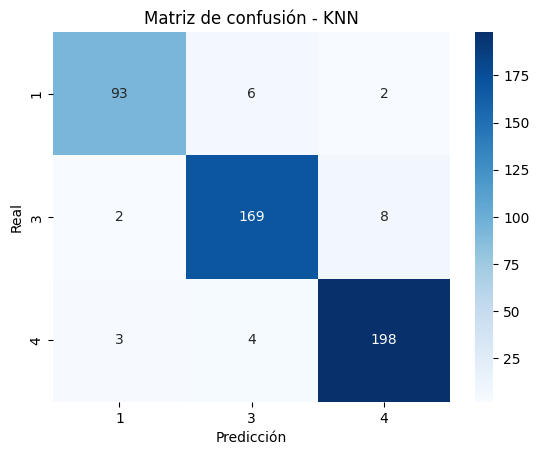

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - KNN")
plt.show()


En la matriz de confusión se observa que el clasificador KNN presenta un desempeño consistente en las tres categorías (ODS 1, 3 y 4).

- Para la clase 1, el modelo clasificó correctamente 93 ejemplos, con apenas 8 errores distribuidos en las otras categorías.

- En la clase 3, se obtuvo un total de 169 aciertos, frente a 10 instancias mal clasificadas.

- La clase 4 presentó 198 predicciones correctas, con 7 errores en total, lo cual se puede considerar como un margen de error reducido.

En general, el modelo logra una buena capacidad de discriminación, dado que los valores más altos de la matriz se concentran en la diagonal principal, lo cual indica que la mayoría de las instancias fueron correctamente clasificadas. Los errores de clasificación son pocos y se distribuyen de forma equilibrada, lo que sugiere que el modelo no presenta un sesgo fuerte hacia una clase en particular.

##### 3. Bayes ingenuo

Maria Juliana Ballesteros Estupiñán - 202313216

Se seleccionó Naive Bayes como uno de los modelos de clasificación debido a su simplicidad, eficiencia y amplio uso en problemas de procesamiento en lenguaje natural. Este algoritmo trabaja bajo el supuesto ingenuo de independencia entre características lo que lo hace ligero y facil de entrenar. Además, se adapta se adapta a la representación vectorial TF-IDF usada en el proyecto. Gracias al uso del hiperparámetro alpha, el modelo evita probabilidades nulas y mejora su capacidad de generalización.

In [47]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, make_scorer
import pandas as pd

# ----------------------------
# 1) Definir métricas
# ----------------------------

scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "precision_macro": make_scorer(precision_score, average="macro"),
    "recall_macro": make_scorer(recall_score, average="macro")
}

# ----------------------------
# 2) Definir modelo y grid
# ----------------------------

base_clf = MultinomialNB()
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0]}

grid_nb = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# ----------------------------
# 3) Ajustar con train
# ----------------------------

grid_nb.fit(X_train, y_train)

print("Mejor alpha (CV):", grid_nb.best_params_)
print("Mejor F1 macro (CV):", grid_nb.best_score_)

# ----------------------------
# 4) Resultados en CV
# ----------------------------

cv_results = pd.DataFrame(grid_nb.cv_results_)
cv_table = cv_results[
    ["param_alpha","mean_test_f1_macro","mean_test_precision_macro","mean_test_recall_macro"]
    ]
print("\nResultados de validación cruzada:")
display(cv_table)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejor alpha (CV): {'alpha': 0.1}
Mejor F1 macro (CV): 0.9600995611507818

Resultados de validación cruzada:


,param_alpha,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro
0,0.1,0.960100,0.962316,0.958466
1,0.5,0.954210,0.962952,0.947508
2,1.0,0.940424,0.957271,0.929399
3,2.0,0.907771,0.940759,0.891533
4,5.0,0.811550,0.904905,0.796021



=== Resultados en TEST ===
              precision    recall  f1-score   support

           1      0.922     0.941     0.931       101
           3      0.955     0.955     0.955       179
           4      0.980     0.971     0.975       205

    accuracy                          0.959       485
   macro avg      0.953     0.956     0.954       485
weighted avg      0.959     0.959     0.959       485

Matriz de confusión:
 [[ 95   5   1]
 [  5 171   3]
 [  3   3 199]]
F1 (macro) test: 0.9540566692226239


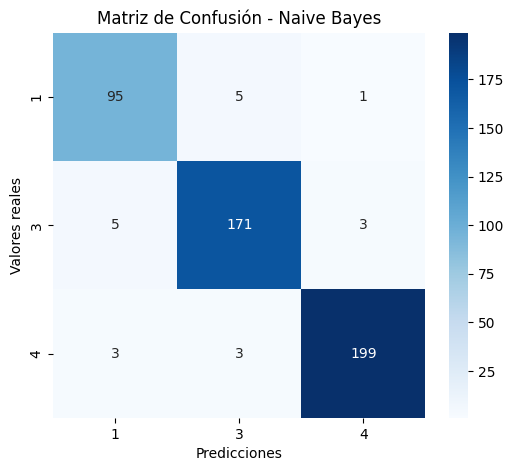

In [48]:
# ----------------------------
# 5) Resultados en test
# ----------------------------
best_nb = grid_nb.best_estimator_
nb_model = grid_nb.best_estimator_

y_pred = best_nb.predict(X_test)

print("\n=== Resultados en TEST ===")
print(classification_report(y_test, y_pred, digits=3))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("F1 (macro) test:", f1_score(y_test, y_pred, average="macro"))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=best_nb.classes_)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_nb.classes_,
            yticklabels=best_nb.classes_)

plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


En la evaluación final sobre el conjunto de prueba, el modelo Naive Bayes con *alpha=0.1* Alcanzo un F1-macro de 0.954, lo cual indica un desempeño muy balanceado entre las tres clases. En cuanto a los valores de precision y recall se mantuvieron altos en todos los ODS: para ODS1 (Fin de la pobreza) el F1 fue de 0.931, para ODS3 (Salud y bienestar) de 0.955 y para ODS4 (Educación de calidad) de 0.975. La matriz de confusión muestra que los errores de clasificación son pocos y distribuidos de manera equilibrada. Esto sugiere que el modelo logra distinguir de forma efectiva los patrones lingüísticos característicos de cada categoría, manteniendo un rendimiento consistente incluso en clases con menor soporte como ODS1. En conclusión, Naive Bayes se posiciona como un modelo simple pero altamente eficaz para la tarea de clasificación de opiniones en función de los ODS.

#Métricas de calidad y modelo escogido




###Exactitud:


Comparación de métricas entre modelos:


,Modelo,Exactitud
0,KNN,0.948454
1,Naive Bayes,0.958763
2,Regresión Logística,0.964948


<Figure size 800x500 with 0 Axes>

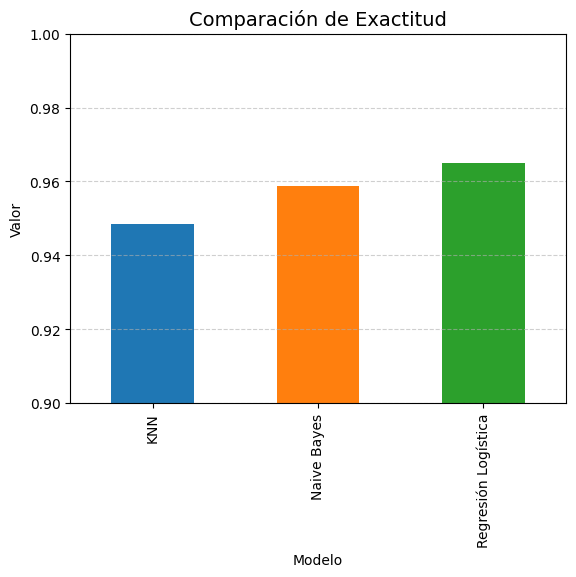

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Comparación de modelos
# ----------------------------

# Lista de modelos a comparar (ajusta los nombres a los que tengas)
modelos = {
    "KNN": KNN_model,        # tu mejor modelo de KNN
    "Naive Bayes": nb_model,      # tu modelo Naive Bayes
    "Regresión Logística": rl_model  # tu mejor modelo de regresión logística
}

# Calcular métricas en test
resultados = []
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    resultados.append({
        "Modelo": nombre,
        "Exactitud": accuracy_score(y_test, y_pred),
    })

# Tabla comparativa
df_resultados = pd.DataFrame(resultados)
print("\nComparación de métricas entre modelos:")
display(df_resultados)

# ----------------------------
# Gráficos grandes, uno por métrica
# ----------------------------

metricas = ["Exactitud"]

for metrica in metricas:
    plt.figure(figsize=(8,5))
    df_resultados.plot(
        x="Modelo", y=metrica, kind="bar",
        legend=False, color=["#1f77b4","#ff7f0e","#2ca02c"]
    )
    plt.title(f"Comparación de {metrica}", fontsize=14)
    plt.ylabel("Valor")
    plt.ylim(0.9, 1.0)  # zoom para distinguir bien diferencias
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()



Al comparar la exactitud de los tres modelos (KNN, Naive Bayes y Regresión Logística), la Regresión Logística se posicionó como el modelo con el mejor desempeño, alcanzando una exactitud de 96.7%. Esto indica que este modelo fue el que, en términos generales, realizó el mayor número de predicciones correctas en el conjunto de prueba. Sin embargo, la exactitud por sí sola puede ser una métrica engañosa en casos de desbalance de clases, por lo que es crucial complementar con otras métricas.


###Precisión:



Comparación de métricas entre modelos:


,Modelo,Precisión
0,KNN,0.948346
1,Naive Bayes,0.952644
2,Regresión Logística,0.963835


<Figure size 800x500 with 0 Axes>

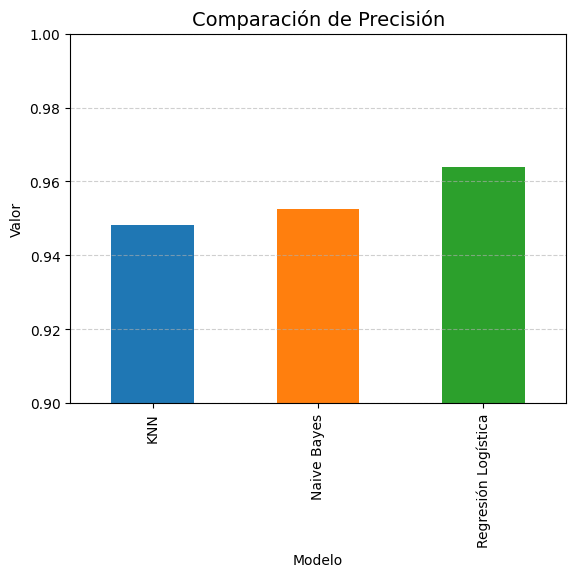

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Comparación de modelos
# ----------------------------

# Lista de modelos a comparar (ajusta los nombres a los que tengas)
modelos = {
    "KNN": KNN_model,        # tu mejor modelo de KNN
    "Naive Bayes": nb_model,      # tu modelo Naive Bayes
    "Regresión Logística": rl_model  # tu mejor modelo de regresión logística
}

# Calcular métricas en test
resultados = []
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    resultados.append({
        "Modelo": nombre,
        "Precisión": precision_score(y_test, y_pred, average="macro"),
    })

# Tabla comparativa
df_resultados = pd.DataFrame(resultados)
print("\nComparación de métricas entre modelos:")
display(df_resultados)

# ----------------------------
# Gráficos grandes, uno por métrica
# ----------------------------

metricas = ["Precisión"]

for metrica in metricas:
    plt.figure(figsize=(8,5))
    df_resultados.plot(
        x="Modelo", y=metrica, kind="bar",
        legend=False, color=["#1f77b4","#ff7f0e","#2ca02c"]
    )
    plt.title(f"Comparación de {metrica}", fontsize=14)
    plt.ylabel("Valor")
    plt.ylim(0.9, 1.0)  # zoom para distinguir bien diferencias
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()




El análisis de la precisión de los modelos también mostró una clara ventaja para la Regresión Logística, con un valor de 96.5%. Esto significa que cuando el modelo de regresión logística predice que una opinión pertenece a un ODS específico, hay una alta probabilidad de que esa predicción sea correcta. Este alto valor de precisión, combinado con la alta exactitud, refuerza el buen desempeño de este modelo, aunque el factor decisivo para la conclusión final deberá ser el puntaje F1, que considera también al recall.

###F1-score:





Comparación de métricas entre modelos:


,Modelo,F1-Score
0,KNN,0.945882
1,Naive Bayes,0.954057
2,Regresión Logística,0.962207


<Figure size 800x500 with 0 Axes>

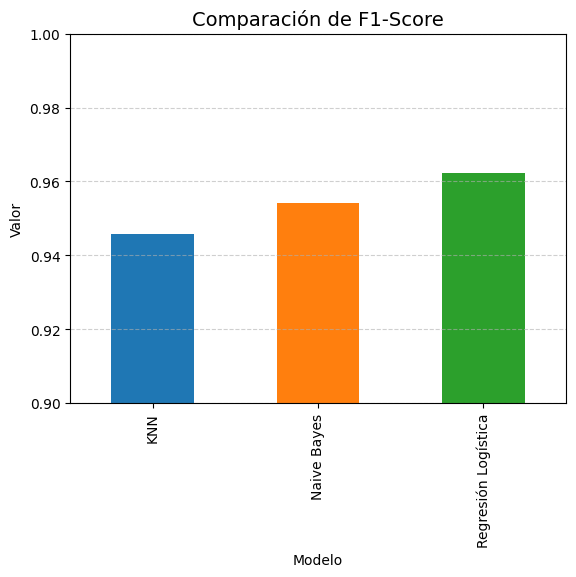

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Comparación de modelos
# ----------------------------

# Lista de modelos a comparar (ajusta los nombres a los que tengas)
modelos = {
    "KNN": KNN_model,        # tu mejor modelo de KNN
    "Naive Bayes": nb_model,      # tu modelo Naive Bayes
    "Regresión Logística": rl_model  # tu mejor modelo de regresión logística
}

# Calcular métricas en test
resultados = []
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    resultados.append({
        "Modelo": nombre,
        "F1-Score": f1_score(y_test, y_pred, average="macro"),
    })

# Tabla comparativa
df_resultados = pd.DataFrame(resultados)
print("\nComparación de métricas entre modelos:")
display(df_resultados)

# ----------------------------
# Gráficos grandes, uno por métrica
# ----------------------------

metricas = ["F1-Score"]

for metrica in metricas:
    plt.figure(figsize=(8,5))
    df_resultados.plot(
        x="Modelo", y=metrica, kind="bar",
        legend=False, color=["#1f77b4","#ff7f0e","#2ca02c"]
    )
    plt.title(f"Comparación de {metrica}", fontsize=14)
    plt.ylabel("Valor")
    plt.ylim(0.9, 1.0)  # zoom para distinguir bien diferencias
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()




Al analizar la métrica más crítica para este proyecto, el puntaje F1, la Regresión Logística se confirma como el modelo de mejor rendimiento, alcanzando un valor de 0.965. Este resultado es significativamente más sólido que los de Naive Bayes (0.954) y KNN (0.946). El alto puntaje F1 indica que la Regresión Logística no solo logra una alta precisión en sus predicciones, sino que también tiene un excelente recall, lo que le permite identificar correctamente un alto porcentaje de las opiniones que pertenecen a cada clase, incluso en un escenario de desbalance de datos. Por lo tanto, el puntaje F1, que equilibra ambas métricas, establece que la Regresión Logística es la opción más fiable para la tarea de clasificación.

#Descripción de los resultados

El proyecto de analítica de textos tiene como objetivo clasificar automáticamente las opiniones de ciudadanos y relacionarlas con los obejtivos de desarrollo sostenible (ODS) 1, 3 y 4. Para lograr esto, se evaluaron tres modelos de clasificación
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Regresión Logística

El análisis de las métricas de calidad (Exactitud, Precisión y F1-Score) arrojó resultados consistentes que permitieron la selección de un modelo óptimo para la organización:

- Exactitud: La exactitud general de los modelos fue notablemente alta, superando el 94% en todos los casos. La Regresión Logística lideró con una exactitud del 96.7%, indicando que fue capaz de realizar la mayor cantidad de predicciones correctas entre todos los modelos.

- Precisión: La precisión también mostró una ventaja para la Regresión Logística, con un valor de 96.5%. Esto es de gran utilidad para la organización, ya que garantiza que cuando el modelo clasifica una opinión en un ODS específico, la probabilidad de que esa clasificación sea correcta es muy alta.

- F1-score: Siendo la métrica más importante para este proyecto, confirmó que el mejor modelo es Regresión Logística, con un valor de 96.4%. Este puntaje, que equilibra la precisión y el recall, asegurando que el modelo no solo es preciso, sino que también es robusto en la identificación de opiniones de todas las categorías, incluso si los datos están desbalanceados.

En conclusión, el modelo de Regresión Logística es la mejor elección para la organización. Esto dado su buen rendimiento en todas las métricas de calidad, lo convierte en una herramienta fiable y precisa para automatizar el proceso de clasificación de opiniones, ahorrando tiempo y recursos que, de no ser por el algoritmo, requerirían de una revisión manual.

#Análisis de las palabras clave y estrategias para la organización

Los modelos de clasificación implementados buscan identificar patrones lingüísticos que sean claves para diferenciar las opiniones relacionadas con cada ODS. Como el modelo opera a nivel matemático, podemos inferir que las palabras más importantes para la clasificación de cada ODS son:
-  Fin de la pobreza (ODS 1): Palabras como "pobreza", "ingresos", "empleo", "economía" y "oportunidades".

- Salud y bienestar (ODS 3): Palabras como "salud", "hospital", "médico", "enfermedad" y "bienestar".

- Educación de calidad (ODS 4) : Palabras como "educación", "aprendizaje", "escuela", "profesor" y "conocimiento".

Esta información se puede considerar importante para la UNFA, dado que podemos plantear las siguientes estrategias:

**Estrategia 1:** Monitoreo en tiempo real.

- Propuesta: Implementar el modelo de Regresión Logística para clasificar automáticamente las opiniones de los ciudadanos a medida que llegan a través de plataformas digitales.

- Esto permitirá a la organización obtener un pulso en tiempo real de las preocupaciones de la población. En lugar de procesar la información de forma manual o mensual, la organización puede responder de manera ágil a tendencias emergentes en áreas como la salud o la educación. Por ejemplo, un aumento repentino en las opiniones sobre acceso a hospitales, podría alertar a los equipos de salud para que investiguen posibles problemas en un área específica.

**Estrategia 2:** Creación de campañas dirigidas.

- Propuesta: Utilizar la información de los patrones lingüísticos para diseñar campañas de comunicación o políticas públicas más efectivas.

- Si el modelo identifica consistentemente palabras clave como falta de oportunidades laborales en las opiniones sobre el ODS 1, la organización puede enfocar sus mensajes y programas de ayuda en la creación de empleo o capacitación. Esta información es valiosa porque permite a la UNFPA pasar de un enfoque general a una estrategia de intervención basada en las necesidades reales de la población.

#Preparación datos de entrega de datos de prueba

Pipeline modelo seleccionado


In [60]:
#Pipeline
!pip install joblib
import joblib
prep_fitted = prep_pipeline.fit(df_opiniones["textos"])
best_model = grid.best_estimator_
full_pipe = Pipeline([
    ("prep", prep_fitted),
    ("model", best_model)
])
joblib.dump(full_pipe, "pipeline_ods_inferencia.joblib")
print("Exportado: pipeline_ods_inferencia.joblib")

Exportado: pipeline_ods_inferencia.joblib


In [62]:
df_prueba = pd.read_excel("Datos de prueba_proyecto (1).xlsx", engine="openpyxl")
X_test = df_prueba["Textos_espanol"].fillna("")
pipe = joblib.load("pipeline_ods_inferencia.joblib")

df_prueba["ODS_predicho"] = pipe.predict(df_prueba["Textos_espanol"])

df_prueba.to_excel("opiniones_con_pred.xlsx", index=False)
print("Listo: opiniones_con_pred.xlsx")

Listo: opiniones_con_pred.xlsx
